In [16]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Se va a hacer la limpieza de los datos para poder utilizar solo la llegada de trenes por dia para inciar el conjunto de modelos necesarios para crear estimaciones de las llegadas de los trenes 

In [11]:
df = pd.read_csv("ModelData.csv")
df = df.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394489 entries, 0 to 394488
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   stcc                  394489 non-null  int32
 1   netWeight             394489 non-null  int32
 2   carLength             394489 non-null  int32
 3   Dia_semana            394489 non-null  int32
 4   estacionOrigen_id     394489 non-null  int32
 5   estacionDestino_id    394489 non-null  int32
 6   consignatario_id      394489 non-null  int32
 7   tipoServicio_id       394489 non-null  int32
 8   idTrenICHR_id         394489 non-null  int32
 9   idFerrocarrilICHR_id  394489 non-null  int32
 10  tipoCarro_id          394489 non-null  int32
 11  año                   394489 non-null  int32
 12  mes                   394489 non-null  int32
 13  dia                   394489 non-null  int32
 14  coches_por_dia        394489 non-null  int32
 15  hora_minuto           394489 non-n

Hacemos limpiwza para quedarnos con los valores que nos son impotante para esta primer etapa 

In [12]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop columns: 'netWeight', 'stcc' and 8 other columns
    df = df.drop(columns=['netWeight', 'stcc', 'carLength', 'estacionOrigen_id', 'estacionDestino_id', 'consignatario_id', 'tipoServicio_id', 'idFerrocarrilICHR_id', 'tipoCarro_id', 'coches_por_dia'])
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Dia_semana,idTrenICHR_id,año,mes,dia,hora_minuto
0,6,0,2018,1,5,1935
39,6,1,2018,1,5,1950
44,6,2,2018,1,5,2050
48,1,3,2018,1,7,1010
58,1,4,2018,1,7,1045


Hacemos el conteo de trenes por dia, teniendo en cuenta tanto mes, dia de la semana y el dia(fecha) de cada tren para obtener esa metriica de manera sencilla


In [13]:
# Count the number of records by day, month, and day of the week
df_count = df_clean.groupby(['dia', 'mes', 'Dia_semana',"año"]).size().reset_index(name='trainsxday')
df_count.head()
df_count.to_csv("./trainsXday/trainsXday.csv", index=False)


Ahora graficamos para encontrar tendencias y de ahi encontrar el modelo para evaluar la data

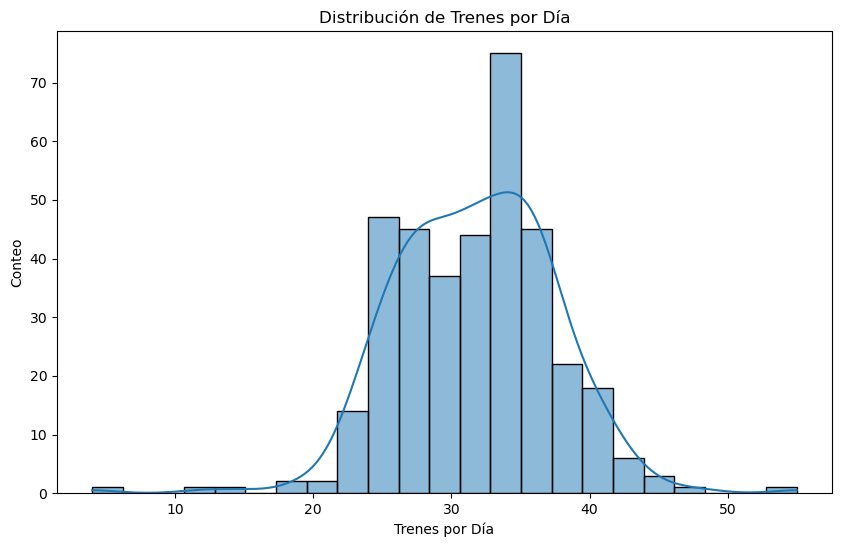

In [15]:
# Histogram of 'coches_por_dia'
plt.figure(figsize=(10, 6))
sns.histplot(df_count['trainsxday'], kde=True)
plt.title('Distribución de Trenes por Día')
plt.xlabel('Trenes por Día')
plt.ylabel('Conteo')
plt.show()

Vemos el rendimiento de un random forest para la etimacion de cuantos trenes por dia llegan a FVTM

In [22]:
# Variables predictoras y variable objetivo
X = df_count[['año', 'mes', 'dia', 'Dia_semana']]
y = df_count['trainsxday']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenamiento y evaluación de Random Forest
rf_model = RandomForestRegressor(max_depth= None, min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
train_score = rf_model.score(X_test,y_test)
print(f'Random Forest RMSE: {rmse_rf}\n Score: {train_score}')

Random Forest RMSE: 6.8867911091321705
 Score: -0.1784659496987897


In [25]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
try1 = linear_model.BayesianRidge()
try1.fit(X_train,y_train)
ols.fit(X_train,y_train)
print(ols.score(X_test,y_test))
print(try1.score(X_test,y_test))


-0.049108178260814705
-0.042723709154758316
